#HydroWatch

##Table of contents



###HydroWatch
    Importing Libraries
        Ignoring random library and suggestion warnings
    Loading the Dataset
    Basic Understanding of Dataset
        Observations:
    Data Transformation
    Checking NULL values
        Observations:
             Lets represent the null values in visualization form... lets be clear with in a glance
        Observations:
    Finding of Outliers
        Observations:
    Handling of Outliers

###Data Visualizations
###Pre Processing of Data
    Logistic Regression
    Decision Tree Classifier
    Random Forest Classifier
    KNN --- K-Nearest-Neighbours
    Support Vector Machine
    AdaBoost Classifiers
    XGBooST Classifier
    Gaussian Naïve Bayes
    Gradient Boosting Classifier


###Model Accuracy
    Accuracy Chart
        Random Forest Model is giving best accuracy score
    Saving the Random Forest model using Pickle library
        Testing the model
        Loading and testing the loaded model

###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###Ignoring random library and suggestion warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

###Loading the Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/HydroWatch-water-Quality_Monitoring-and-Prediction-system/waterQualityPrediction.csv")

###Basic Understanding of Dataset

In [4]:
df.shape

(7999, 21)

In [5]:

df.head(10)

aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   
5       0.94   14.47     0.03    2.88    0.003        0.80      0.43    1.38   
6       2.36     5.6     0.01    1.35    0.004        1.28      0.62    1.88   
7       3.93   19.87     0.04    0.66    0.001        6.22      0.10    1.86   
8       0.60   24.58     0.01    0.71    0.005        3.14      0.77    1.45   
9       0.22   16.76     0.02    1.37    0.007        6.40      0.49    0.82   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   
5      0.11      0.67  ...  0.135      9.75      1.89    0.006        27.17   
6      0.33      0.13  ...  0.021     18.60      1.78    0.007        45.34   
7      0.86      0.16  ...  0.197     13.65      1.81    0.001        53.35   
8      0.98      0.35  ...  0.167     14.66      1.84    0.004        23.43   
9      1.24      0.83  ...  0.109      4.79      1.46    0.010        30.42   

   radium  selenium  silver  uranium  is_safe  
0    6.78      0.08    0.34     0.02        1  
1    3.21      0.08    0.27     0.05        1  
2    7.07      0.07    0.44     0.01        0  
3    1.72      0.02    0.45     0.05        1  
4    2.41      0.02    0.06     0.02        1  
5    5.42      0.08    0.19     0.02        1  
6    2.84      0.10    0.24     0.08        0  
7    7.24      0.08    0.08     0.07        0  
8    4.99      0.08    0.25     0.08        1  
9    0.08      0.03    0.31     0.01        1  

[10 rows x 21 columns]

In [6]:

df.tail(10)

aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
7989       0.01   27.73     0.06    0.77     0.09        0.20      0.03   
7990       0.00    3.11     0.07    1.24     0.07        0.06      0.03   
7991       0.03    8.94     0.02    1.25     0.08        0.22      0.02   
7992       0.04   10.84     0.06    0.49     0.04        0.08      0.03   
7993       0.02    5.24     0.05    0.77     0.02        0.57      0.04   
7994       0.05    7.78     0.00    1.95     0.04        0.10      0.03   
7995       0.05   24.22     0.02    0.59     0.01        0.45      0.02   
7996       0.09    6.85     0.00    0.61     0.03        0.05      0.05   
7997       0.01      10     0.01    2.00     0.00        2.00      0.00   
7998       0.04    6.85     0.01    0.70     0.03        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
7989    0.00      0.58       0.0  ...  0.112     11.74       1.0    0.007   
7990    0.04      0.74       0.0  ...  0.016     15.15       1.0    0.005   
7991    0.05      0.71       0.0  ...  0.112     11.97       1.0    0.001   
7992    0.08      0.49       0.0  ...  0.151     14.44       1.0    0.003   
7993    0.03      0.15       0.0  ...  0.085     19.41       1.0    0.001   
7994    0.03      1.37       0.0  ...  0.197     14.29       1.0    0.005   
7995    0.02      1.48       0.0  ...  0.031     10.27       1.0    0.001   
7996    0.02      0.91       0.0  ...  0.182     15.92       1.0    0.000   
7997    0.09      0.00       0.0  ...  0.000      0.00       0.0    0.000   
7998    0.03      1.00       0.0  ...  0.182     15.92       1.0    0.000   

      perchlorate  radium  selenium  silver  uranium  is_safe  
7989         7.58    7.21      0.07    0.04     0.09        0  
7990         0.46    6.24      0.03    0.09     0.05        0  
7991         7.18    1.73      0.00    0.04     0.06        1  
7992         0.34    2.16      0.06    0.03     0.05        1  
7993         1.68    3.55      0.05    0.07     0.07        1  
7994         3.57    2.13      0.09    0.06     0.03        1  
7995         1.48    1.11      0.09    0.10     0.08        1  
7996         1.35    4.84      0.00    0.04     0.05        1  
7997         0.00    0.00      0.00    0.00     0.00        1  
7998         1.35    4.84      0.00    0.04     0.05        1  

[10 rows x 21 columns]

In [7]:

df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu


###Observations:
We can observe that ammonia and is_safe are having different data types...

Lets transform them into appropriate data types using astype() method

###Data Transformation

In [9]:

df = df[df['ammonia'] != '#NUM!']

In [10]:
df['ammonia'] = df['ammonia'].astype('float')
df['is_safe'] = df['is_safe'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [11]:

df.rename(columns={'is_safe': 'potability'}, inplace=True)

In [12]:
df

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05      0.20  ...  0.054     16.08      1.13    0.007   
1       0.66      0.90      0.65  ...  0.100      2.01      1.93    0.003   
2       0.02      0.99      0.05  ...  0.078     14.16      1.11    0.006   
3       1.66      1.08      0.71  ...  0.016      1.41      1.29    0.004   
4       0.57      0.61      0.13  ...  0.117      6.74      1.11    0.003   
...      ...       ...       ...  ...    ...       ...       ...      ...   
7994    0.03      1.37      0.00  ...  0.197     14.29      1.00    0.005   
7995    0.02      1.48      0.00  ...  0.031     10.27      1.00    0.001   
7996    0.02      0.91      0.00  ...  0.182     15.92      1.00    0.000   
7997    0.09      0.00      0.00  ...  0.000      0.00      0.00    0.000   
7998    0.03      1.00      0.00  ...  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  potability  
0           37.75    6.78      0.08    0.34     0.02           1  
1           32.26    3.21      0.08    0.27     0.05           1  
2           50.28    7.07      0.07    0.44     0.01           0  
3            9.12    1.72      0.02    0.45     0.05           1  
4           16.90    2.41      0.02    0.06     0.02           1  
...           ...     ...       ...     ...      ...         ...  
7994         3.57    2.13      0.09    0.06     0.03           1  
7995         1.48    1.11      0.09    0.10     0.08           1  
7996         1.35    4.84      0.00    0.04     0.05           1  
7997         0.00    0.00      0.00    0.00     0.00           1  
7998         1.35    4.84      0.00    0.04     0.05           1  

[7996 rows x 21 columns]

In [13]:
df.describe()

aluminium      ammonia      arsenic       barium      cadmium  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.666396    14.278212     0.161477     1.567928     0.042803   
std       1.265323     8.878930     0.252632     1.216227     0.036049   
min       0.000000    -0.080000     0.000000     0.000000     0.000000   
25%       0.040000     6.577500     0.030000     0.560000     0.008000   
50%       0.070000    14.130000     0.050000     1.190000     0.040000   
75%       0.280000    22.132500     0.100000     2.482500     0.070000   
max       5.050000    29.840000     1.050000     4.940000     0.130000   

        chloramine     chromium       copper     flouride     bacteria  ...  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  ...   
mean      2.177589     0.247300     0.805940     0.771646     0.319714  ...   
std       2.567210     0.270663     0.653595     0.435423     0.329497  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.100000     0.050000     0.090000     0.407500     0.000000  ...   
50%       0.530000     0.090000     0.750000     0.770000     0.220000  ...   
75%       4.240000     0.440000     1.390000     1.160000     0.610000  ...   
max       8.680000     0.900000     2.000000     1.500000     1.000000  ...   

              lead     nitrates     nitrites      mercury  perchlorate  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.099431     9.819250     1.329846     0.005193    16.465266   
std       0.058169     5.541977     0.573271     0.002967    17.688827   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.048000     5.000000     1.000000     0.003000     2.170000   
50%       0.102000     9.930000     1.420000     0.005000     7.745000   
75%       0.151000    14.610000     1.760000     0.008000    29.487500   
max       0.200000    19.830000     2.930000     0.010000    60.010000   

            radium     selenium       silver      uranium   potability  
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  
mean      2.920106     0.049684     0.147811     0.044672     0.114057  
std       2.322805     0.028773     0.143569     0.026906     0.317900  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.820000     0.020000     0.040000     0.020000     0.000000  
50%       2.410000     0.050000     0.080000     0.050000     0.000000  
75%       4.670000     0.070000     0.240000     0.070000     0.000000  
max       7.990000     0.100000     0.500000     0.090000     1.000000  

[8 rows x 21 columns]


###Checking NULL values

In [14]:

df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
potability     0
dtype: int64


###Observations:
There are no null values in this dataset


**Lets represent the null values in visualization form... lets be clear with in a glance**

<Axes: >

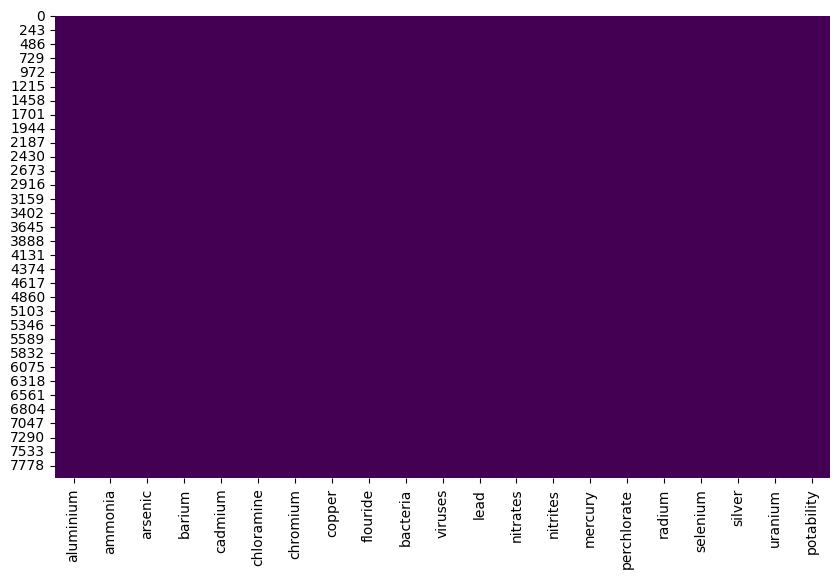

In [15]:

plt.figure(figsize = (10,6))
sns.heatmap(df.isnull(),cmap='viridis', cbar=False)


###Observations:
There are no null values in this dataset

##Finding of Outliers

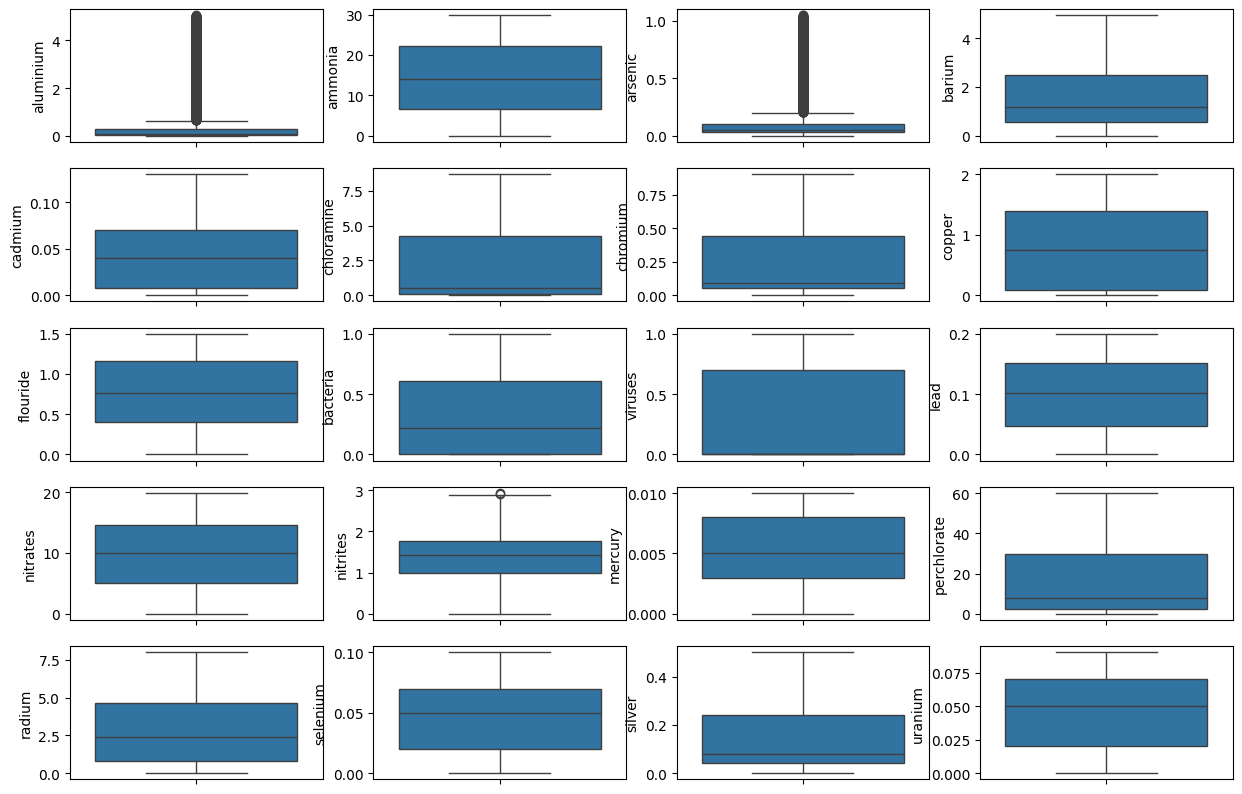

In [16]:

fig, ax = plt.subplots(5, 4, figsize=(15,10))  # Adjust the size as needed
index = 0
for col, values in df.items():
    if index < len(ax.flat):
        sns.boxplot(y=col, data=df, ax=ax.flat[index])
        index += 1
    else:
        break


##Observations:
We can observe that aluminium, arsenic, and nitrates have some outliers

##Handling of Outliers

##For handling outliers we have two techniques

IQR method

Z-score method

In [17]:
x= np.quantile(df['aluminium'],[0.25,0.75])
iqr = x[1]-x[0]
uw = x[1] + 1.5 * iqr
lw = x[0] - 1.5 * iqr

In [18]:
df['aluminium'] = np.where(df['aluminium']>uw,uw,(np.where(df['aluminium']<lw,lw,df['aluminium'])))

In [19]:
x= np.quantile(df['arsenic'],[0.25,0.75])
iqr = x[1]-x[0]
uw = x[1] + 1.5 * iqr
lw = x[0] - 1.5 * iqr

In [20]:
df['arsenic'] = np.where(df['arsenic']>uw,uw,(np.where(df['arsenic']<lw,lw,df['arsenic'])))

In [21]:

x= np.quantile(df['nitrites'],[0.25,0.75])
iqr = x[1]-x[0]
uw = x[1] + 1.5 * iqr
lw = x[0] - 1.5 * iqr


In [22]:
df['nitrites'] = np.where(df['nitrites']>uw,uw,(np.where(df['nitrites']<lw,lw,df['nitrites'])))

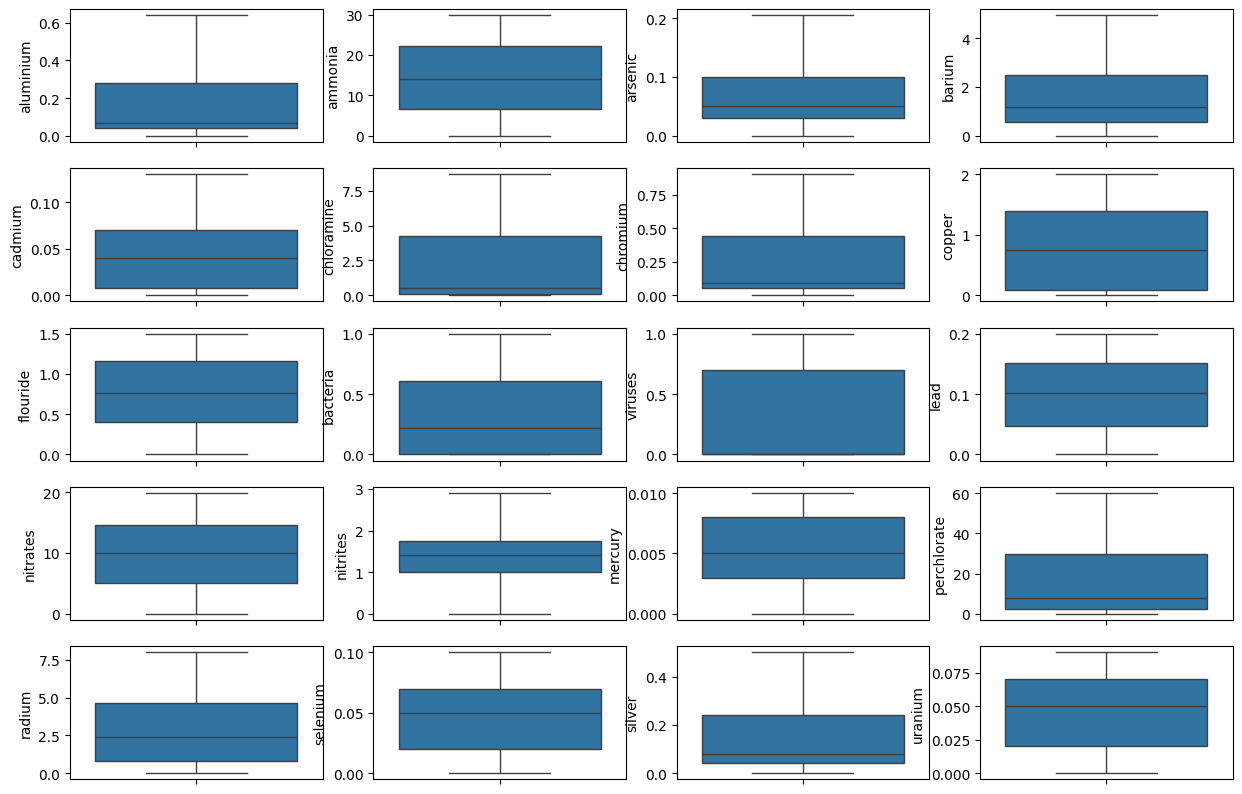

In [23]:
fig, ax = plt.subplots(5, 4, figsize=(15,10))  # Adjust the size as needed
index = 0
for col, values in df.items():
    if index < len(ax.flat):
        sns.boxplot(y=col, data=df, ax=ax.flat[index])
        index += 1
    else:
        break

outliers has been handled

In [24]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'potability'],
      dtype='object')

#Data Visualizations

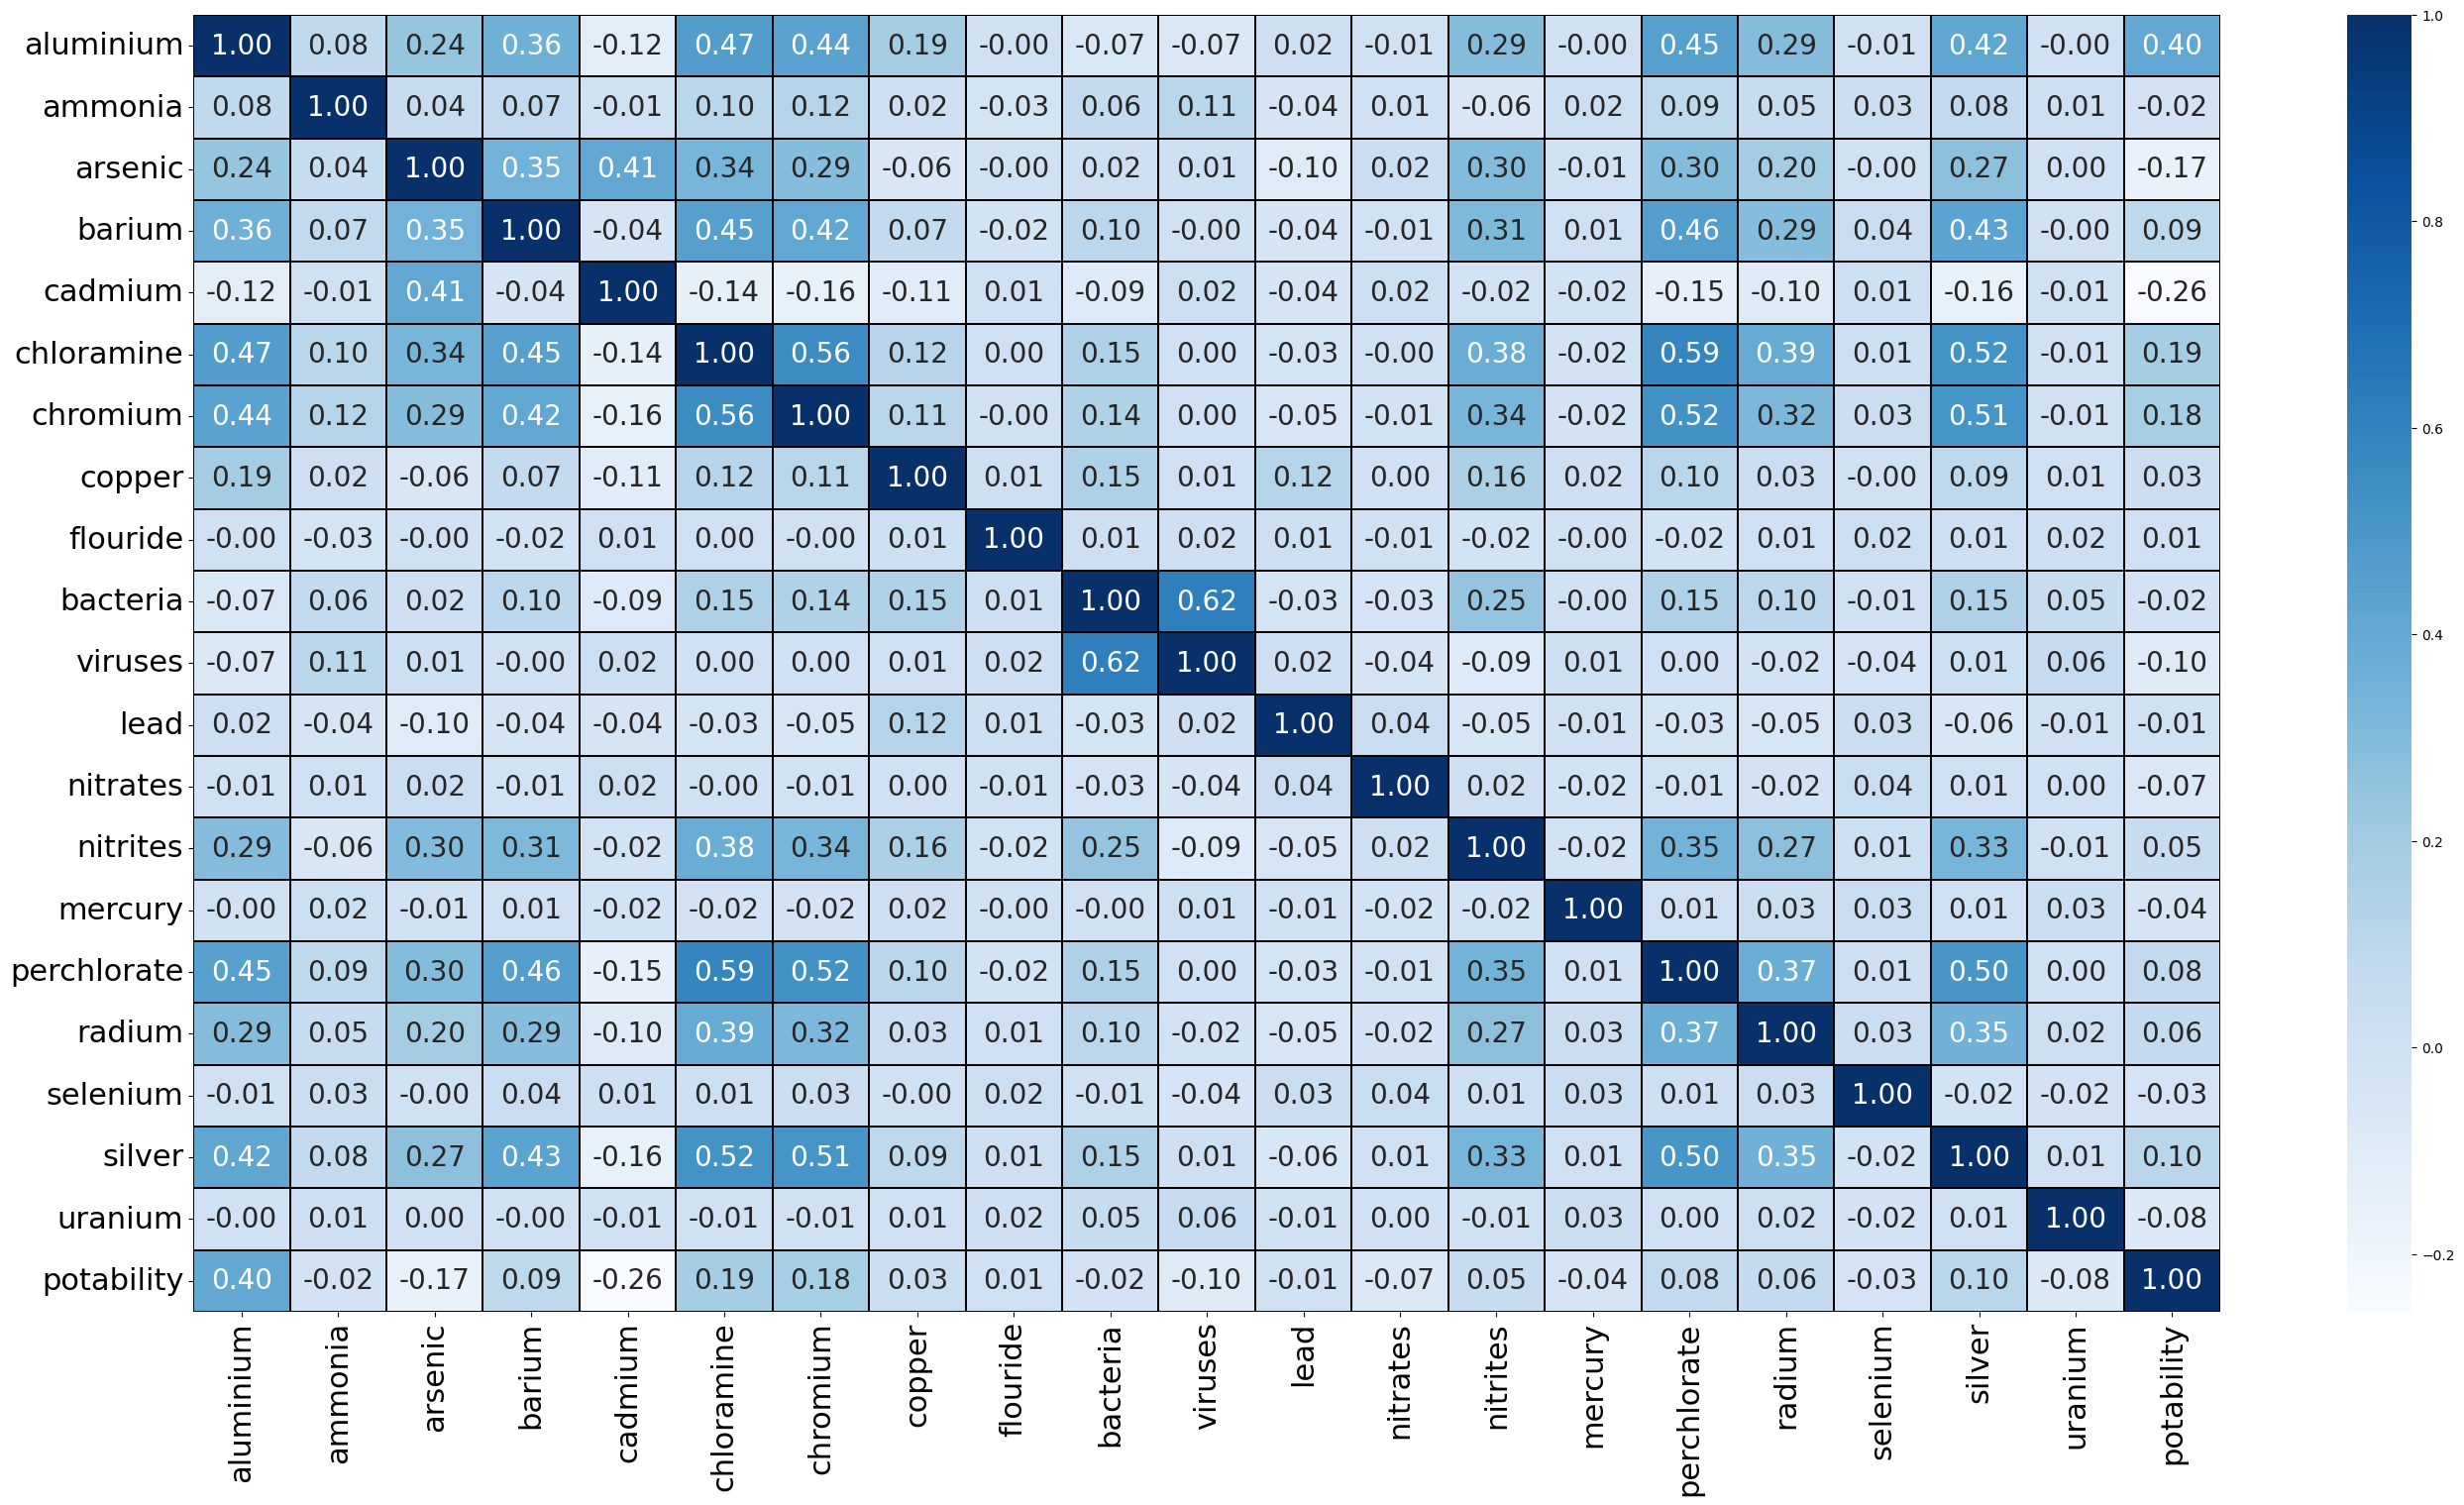

In [25]:

plt.figure(figsize = (33,17))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues', linewidths = 0.01, linecolor = 'black',
            fmt = '0.2f', annot_kws = {'fontsize' : 20})
plt.yticks(fontsize = 22, rotation = 0)
plt.xticks(fontsize = 22, rotation = 90)
plt.show()

In [26]:

fig = px.pie(df,names="potability",hole = 0.4,template = "plotly_dark")
fig.show()

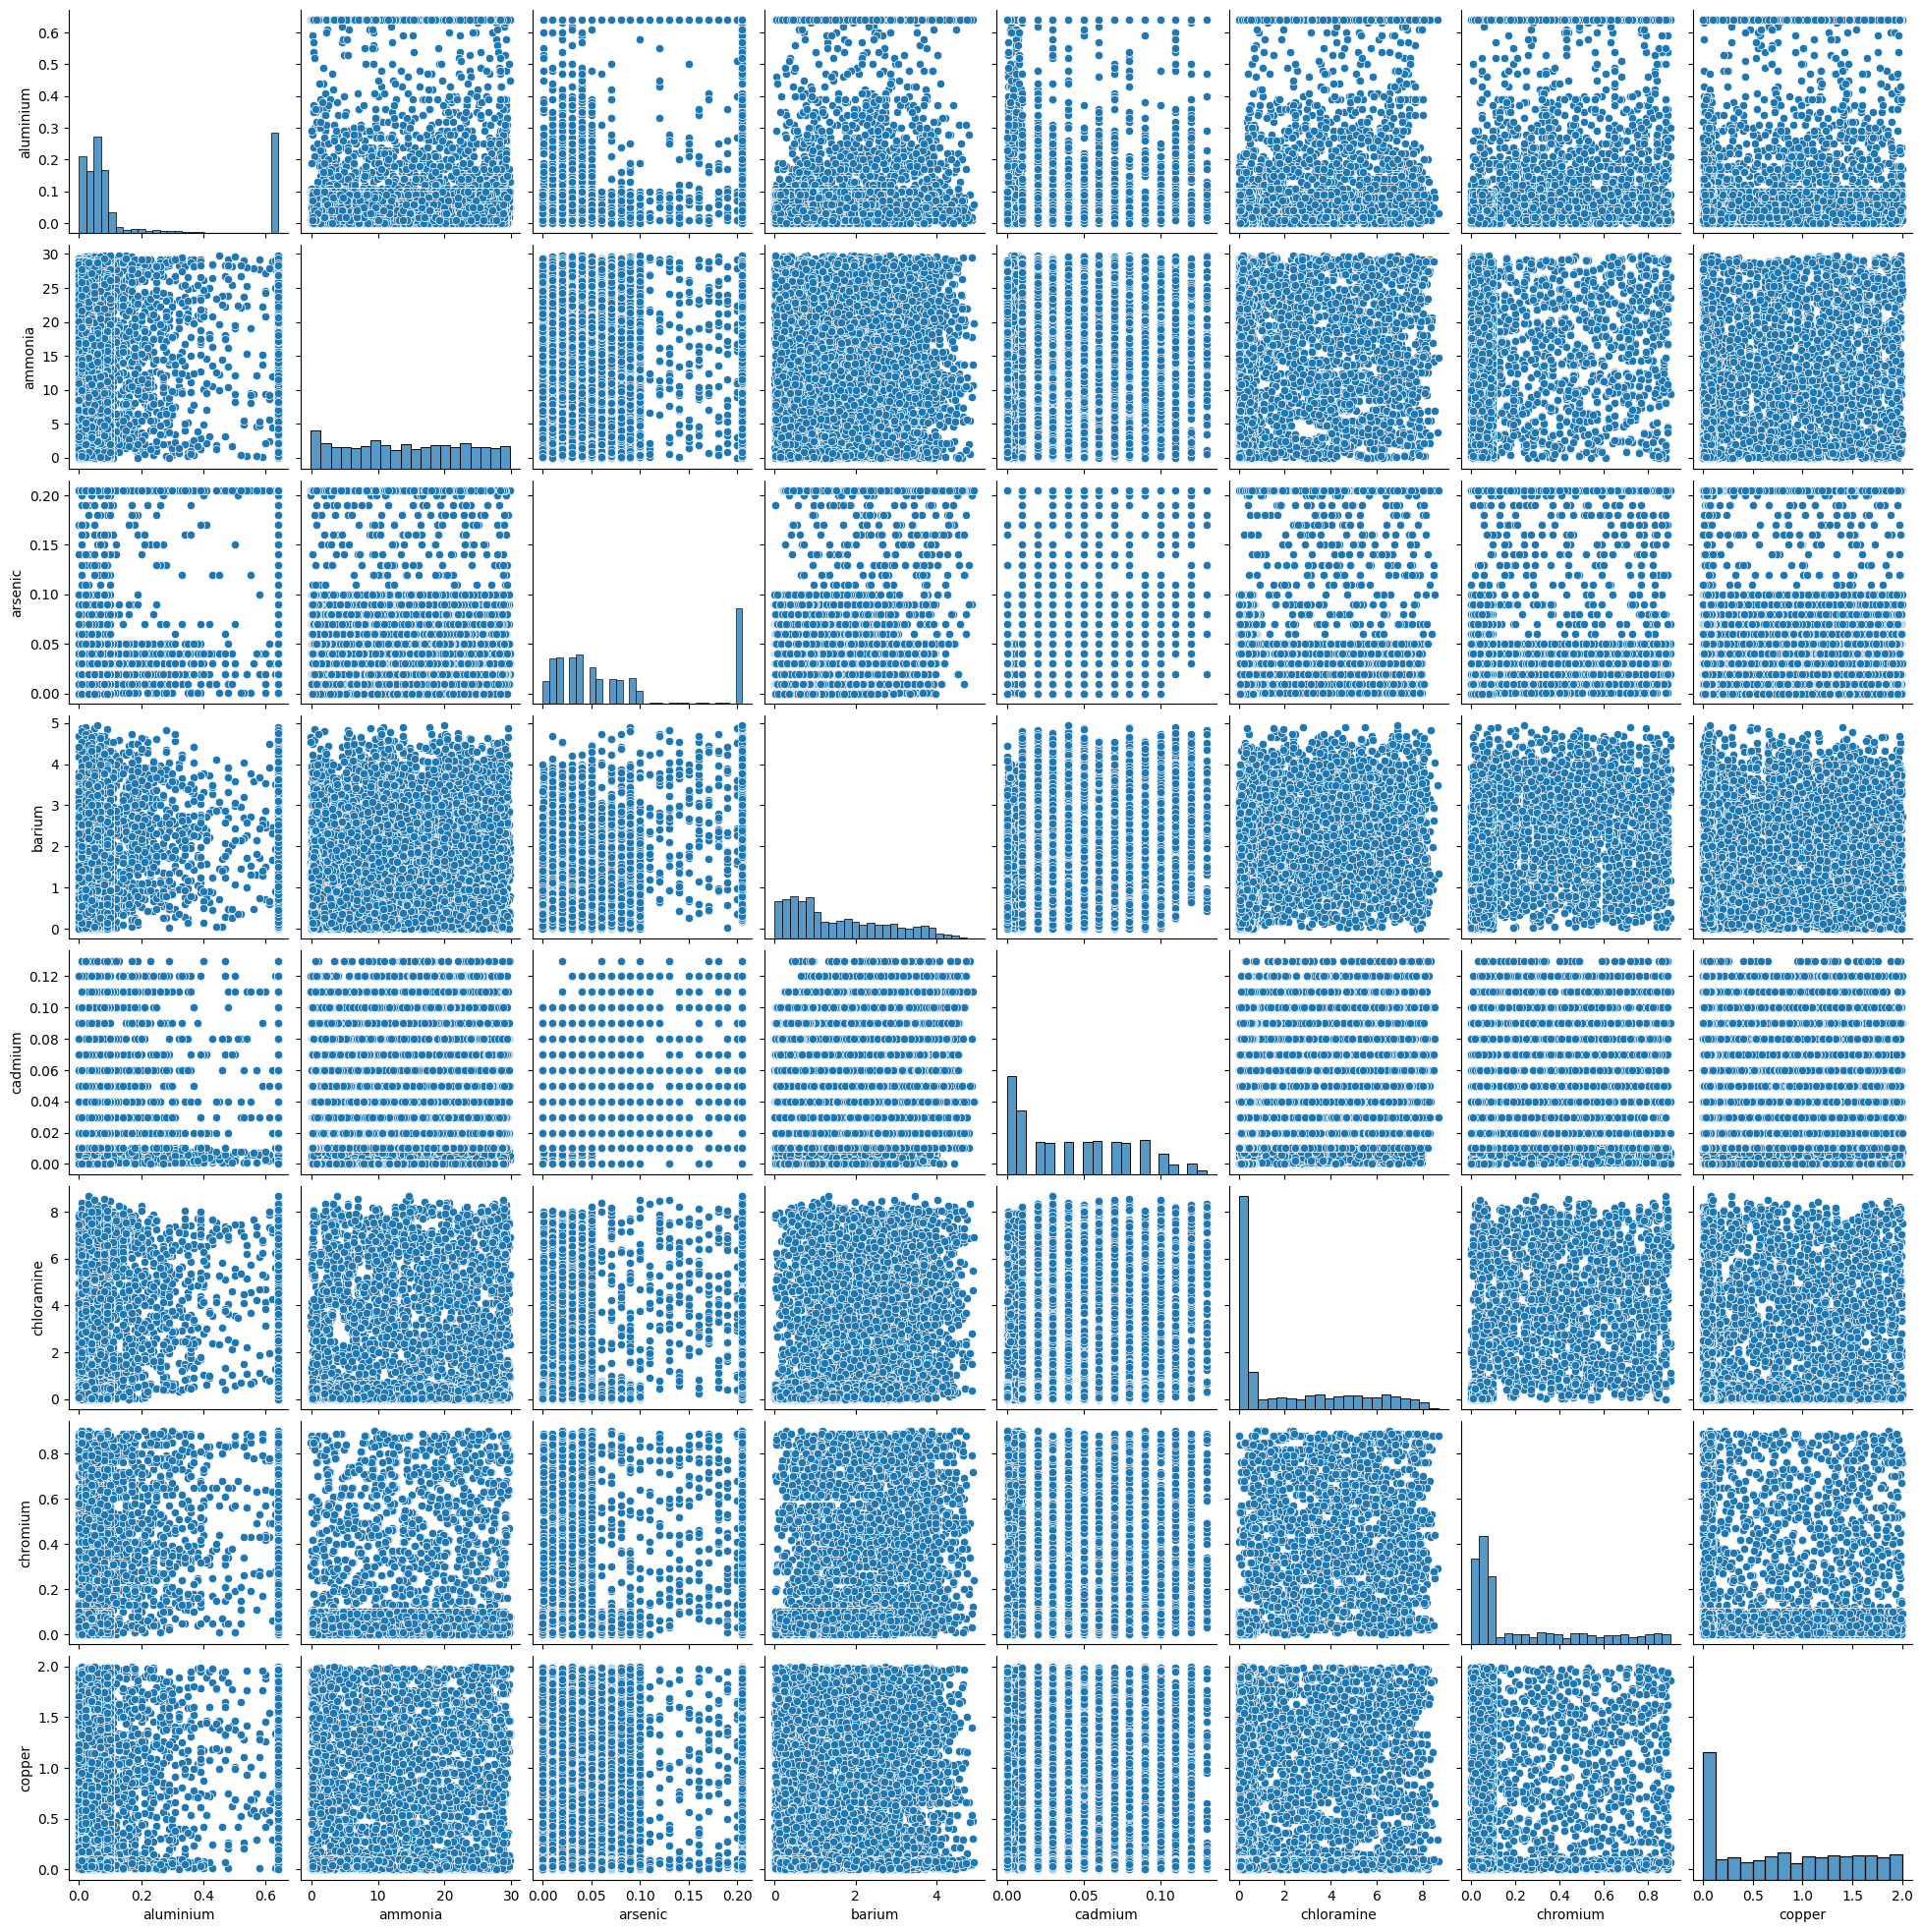

In [27]:
sns.pairplot(df[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper']])

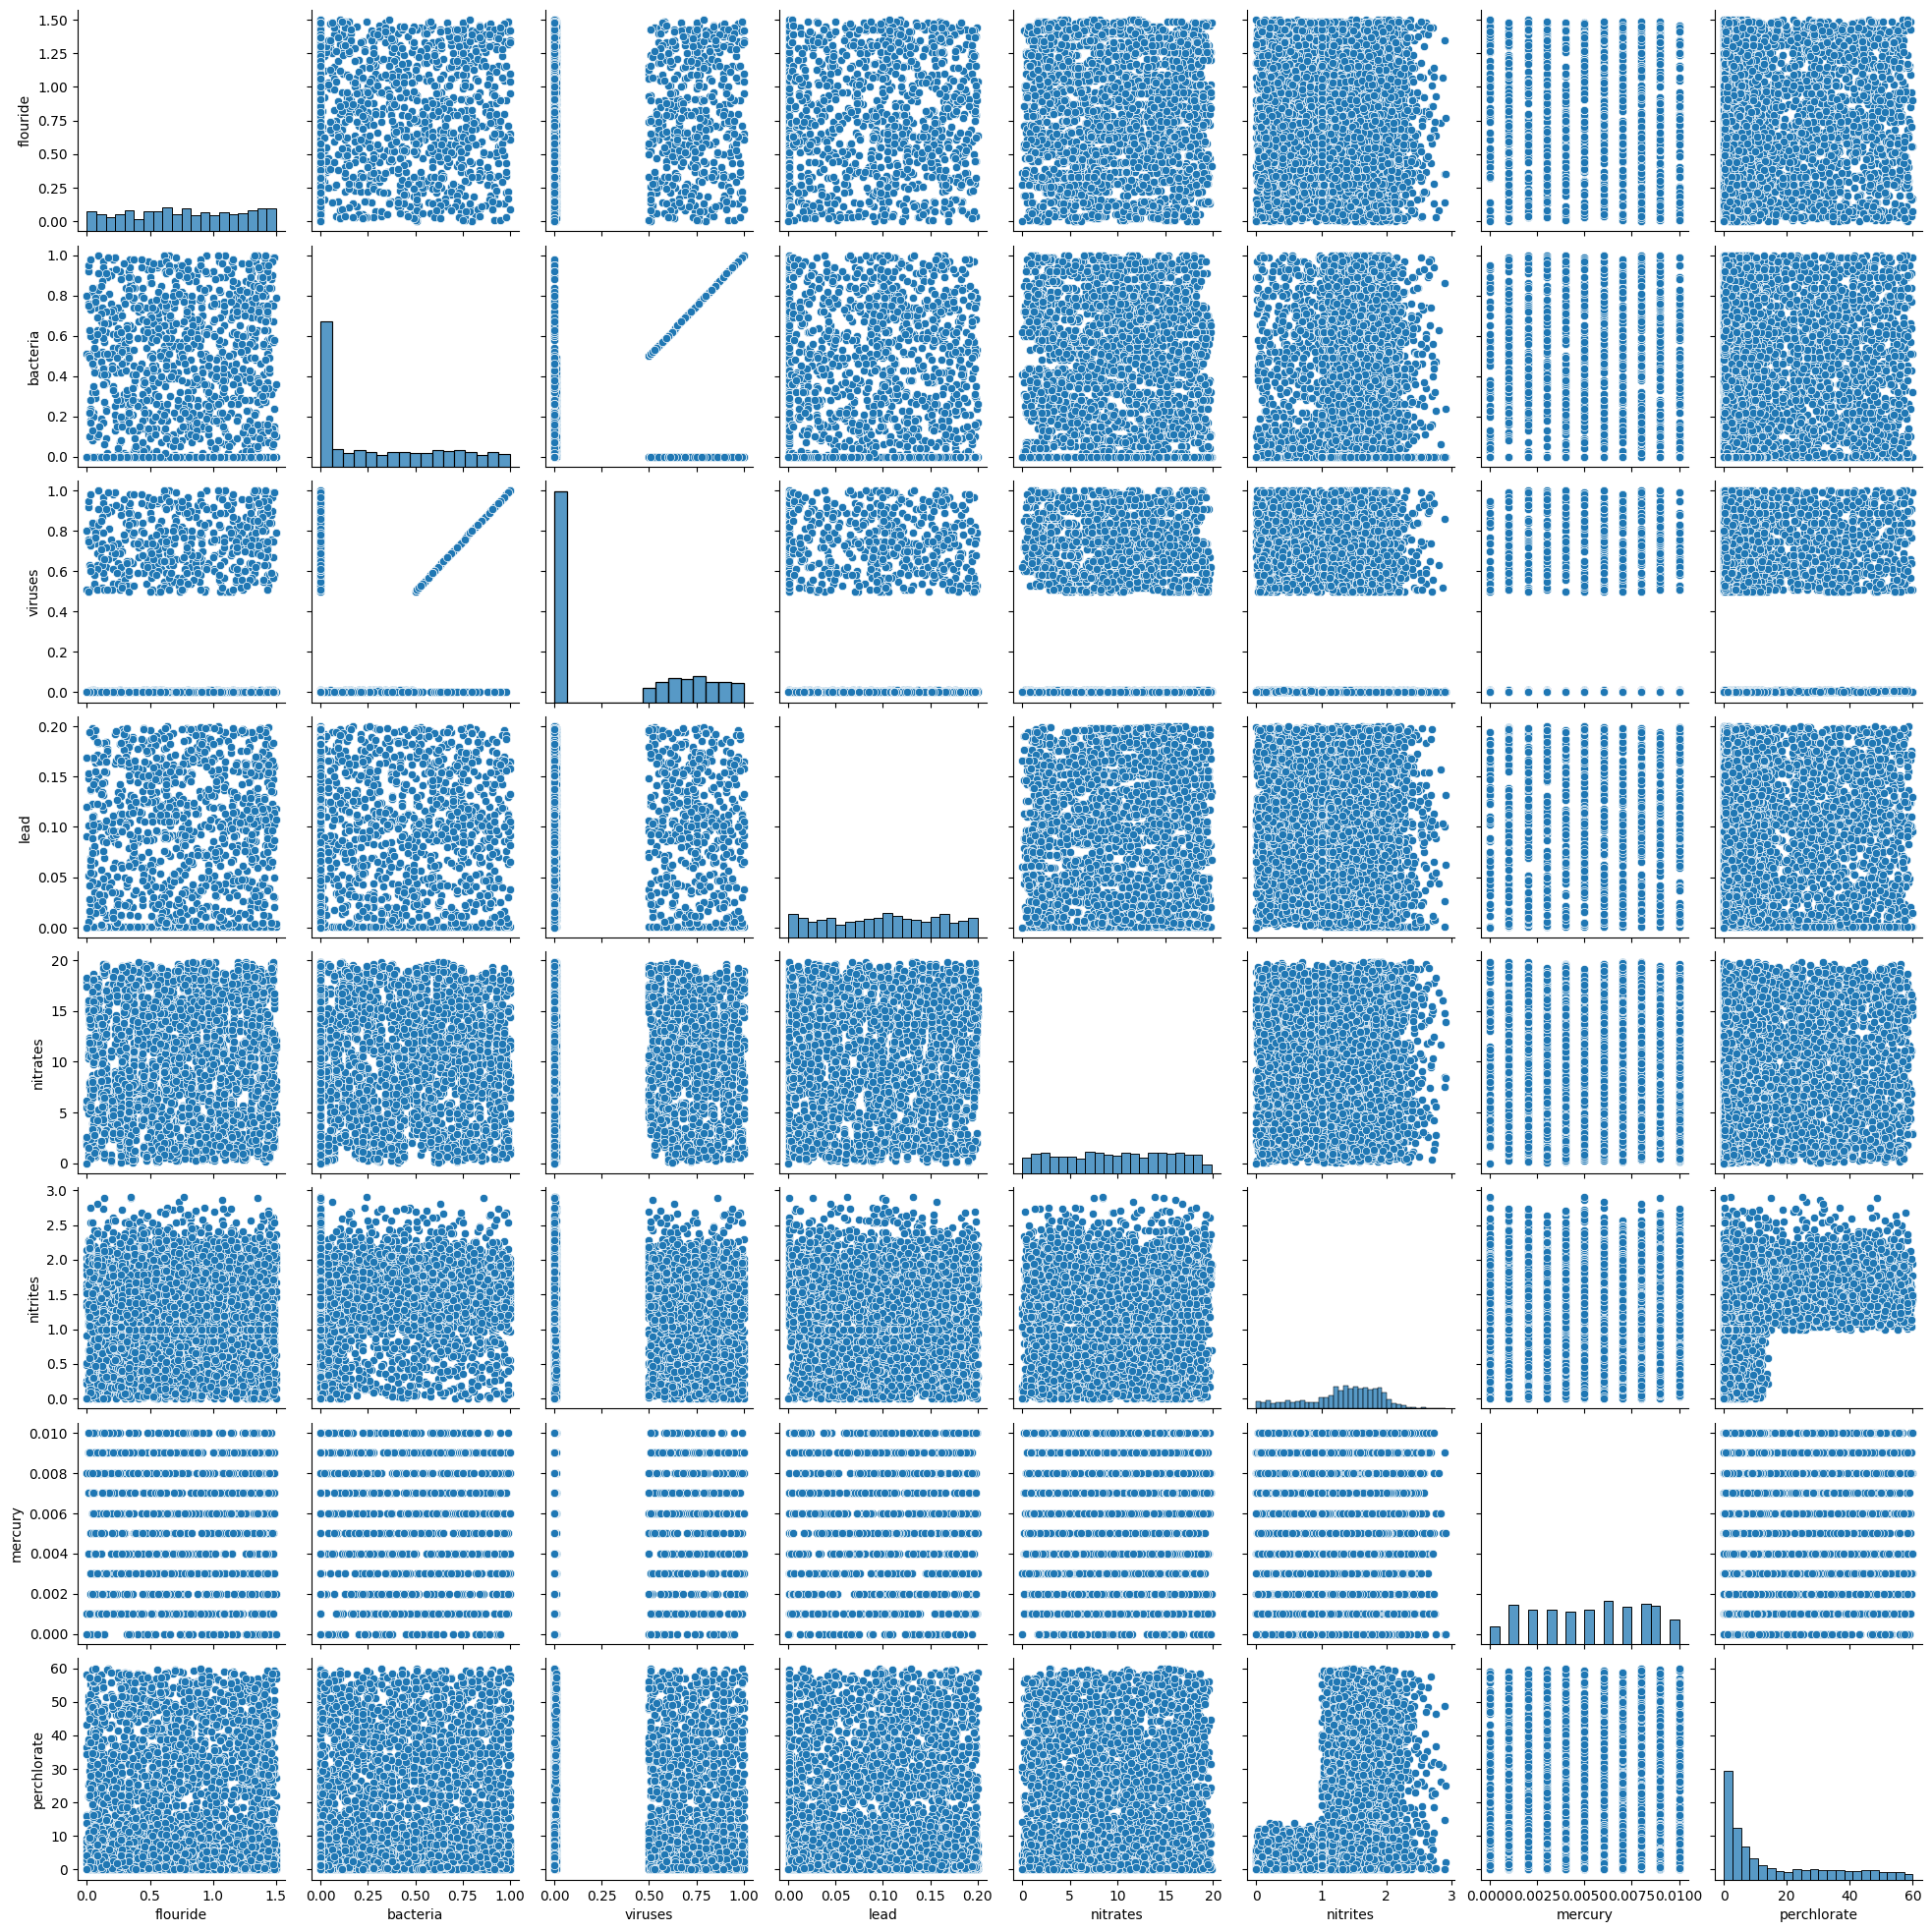

In [28]:
sns.pairplot(df[['flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate']])

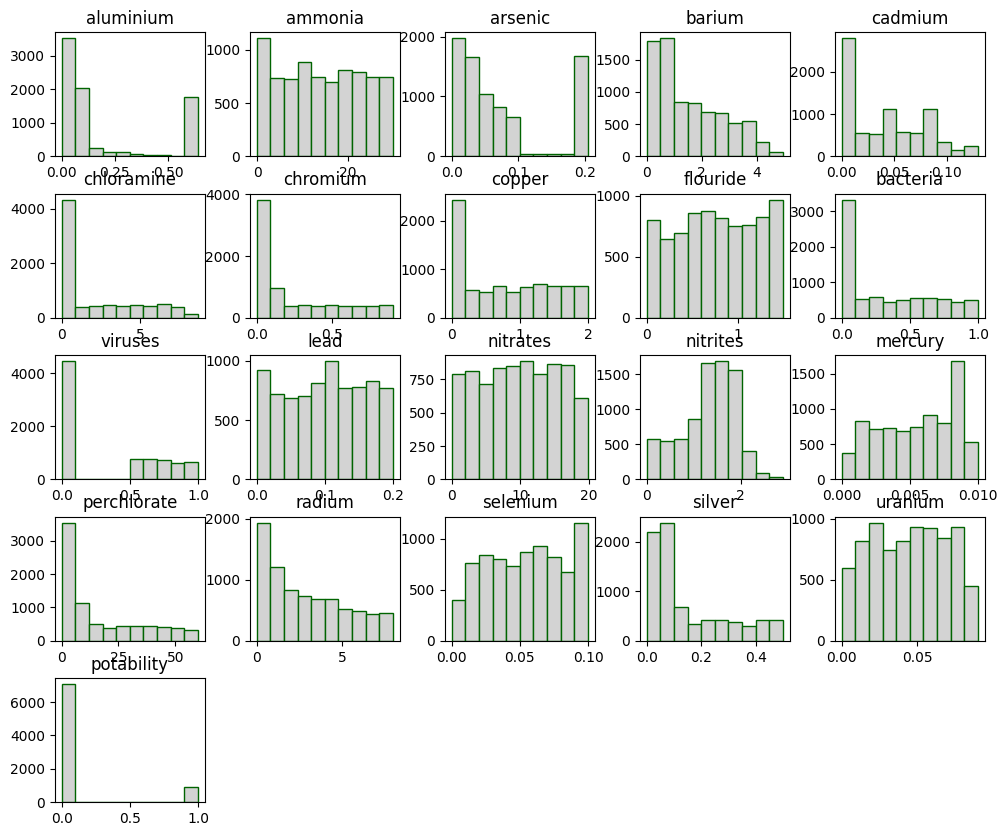

In [29]:
df.hist(grid = False, color ='lightgrey', edgecolor = 'darkgreen', figsize = (12,10));

In [30]:

fig = px.scatter(df,x = "radium",y="arsenic")
fig.show()

In [31]:
fig = px.scatter(df,x = "nitrates",y="chromium")
fig.show()

In [32]:
fig = px.scatter(df,x = "barium",y="copper")
fig.show()

<Axes: xlabel='potability', ylabel='nitrites'>

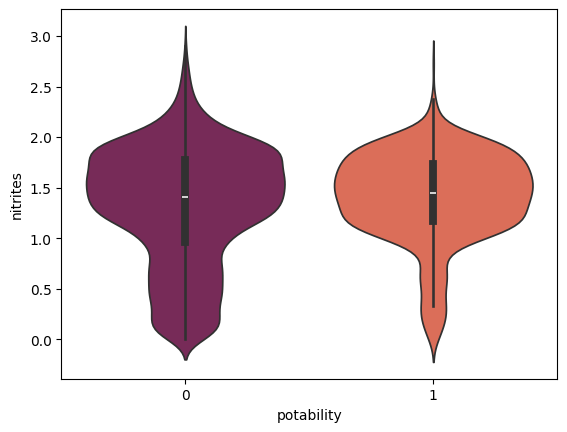

In [33]:
sns.violinplot(x='potability', y='nitrites', data=df, palette='rocket')

<Axes: xlabel='potability', ylabel='chromium'>

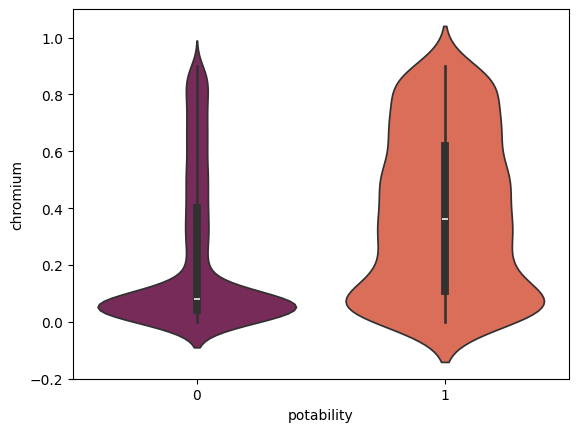

In [34]:
sns.violinplot(x='potability', y='chromium', data=df, palette='rocket')

In [35]:
fig = px.scatter(df,x = "nitrites",y="nitrates",color = "potability")
fig.show()

In [36]:
fig = px.scatter(df,x = "lead",y="chromium",color = "potability")
fig.show()

In [37]:
fig = px.scatter(df,x = "bacteria",y = "flouride",color = "potability")
fig.show()

In [38]:
fig = px.scatter(df,x = "chloramine",y = "viruses",color = "potability")
fig.show()

#Pre Processing of Data

In [39]:

x = df.drop("potability",axis=1)
y = df["potability"]

In [40]:

from imblearn.over_sampling import SMOTE
from collections import Counter
print(Counter(y))

Counter({0: 7084, 1: 912})


In [41]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

In [42]:
x_resampled.shape, y_resampled.shape

((14168, 20), (14168,))

In [43]:
print(Counter(y_resampled))

Counter({1: 7084, 0: 7084})


In [44]:

x.shape , y.shape

((7996, 20), (7996,))

In [45]:
x = x_resampled
y = y_resampled

In [46]:
fig = px.pie(y,names="potability",hole = 0.4,template = "plotly_dark")
fig.show()

In [47]:
df.to_csv('output_file.csv', index=False)


In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [49]:

x_train.shape, x_test.shape

((11334, 20), (2834, 20))

#Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

In [51]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [52]:

pred_lr = model_lr.predict(x_test)

In [53]:

accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

81.58080451658434

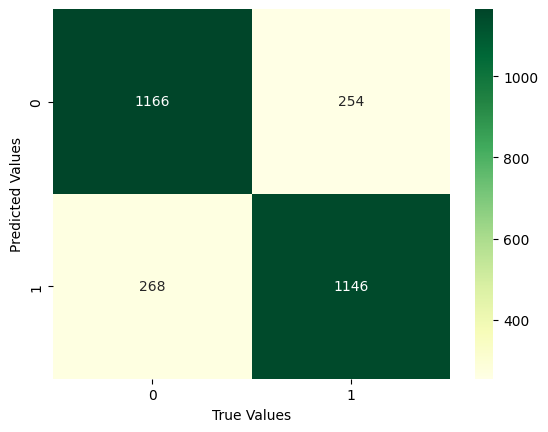

In [54]:
sns.heatmap((confusion_matrix(y_test,pred_lr)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [55]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1420
           1       0.82      0.81      0.81      1414

    accuracy                           0.82      2834
   macro avg       0.82      0.82      0.82      2834
weighted avg       0.82      0.82      0.82      2834



#Decision Tree Classifier

In [56]:

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth = 4)

In [57]:

for i in range(1,11):
    model_dt = DecisionTreeClassifier(max_depth=i)
    model_dt.fit(x_train,y_train)
    pred_dt = model_dt.predict(x_test)
    accuracy_score_dt = accuracy_score(y_test,pred_dt)
    print(i,accuracy_score_dt)

1 0.7932251235003529
2 0.8500352858151023
3 0.8507410021171489
4 0.9004940014114327
5 0.9170783345095271
6 0.9343683839096684
7 0.9484827099505999
8 0.954834156669019
9 0.9576570218772054
10 0.9594213126323218


In [58]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [59]:

pred_dt = model_dt.predict(x_test)

In [60]:
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

95.80098800282286

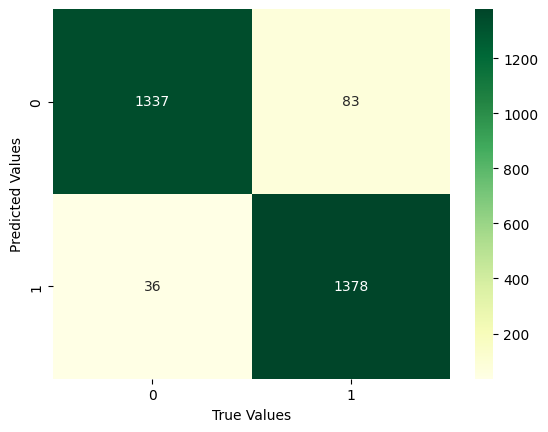

In [61]:

sns.heatmap((confusion_matrix(y_test,pred_dt)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [62]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1420
           1       0.94      0.97      0.96      1414

    accuracy                           0.96      2834
   macro avg       0.96      0.96      0.96      2834
weighted avg       0.96      0.96      0.96      2834



#Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [64]:
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
pred_rf = model_rf.predict(x_test)
print("Predicted: ",Counter(pred_rf))
print("Actual: ",Counter(y_test))

Predicted:  Counter({1: 1452, 0: 1382})
Actual:  Counter({0: 1420, 1: 1414})


In [66]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

97.38884968242768

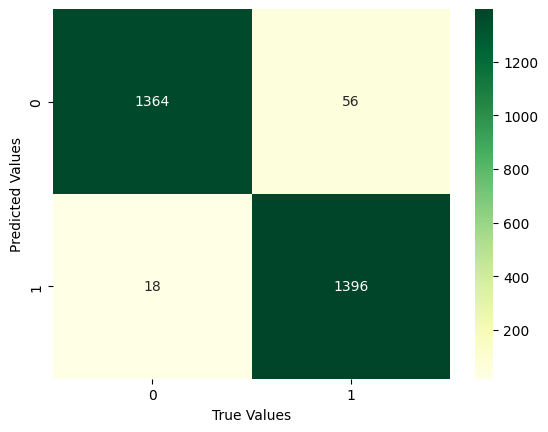

In [67]:
sns.heatmap((confusion_matrix(y_test,pred_rf)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [68]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1420
           1       0.96      0.99      0.97      1414

    accuracy                           0.97      2834
   macro avg       0.97      0.97      0.97      2834
weighted avg       0.97      0.97      0.97      2834



#KNN --- K-Nearest-Neighbours

In [69]:

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

In [70]:

for i in range(4,11):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn = model_knn.predict(x_test)
    accuracy_score_knn = accuracy_score(y_test,pred_knn)
    print(i,accuracy_score_knn)

4 0.876499647141849
5 0.8525052928722654
6 0.8546224417784051
7 0.8394495412844036
8 0.8461538461538461
9 0.8295695130557516
10 0.8359209597741708


Lets take "4" for n_neighbors because it is giving 87% accuracy

In [71]:
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test,pred_knn)
print(accuracy_score_knn*100)

87.6499647141849


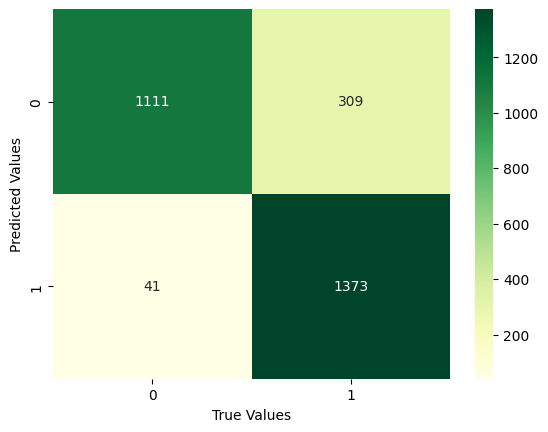

In [72]:
sns.heatmap((confusion_matrix(y_test,pred_knn)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [73]:

print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1420
           1       0.82      0.97      0.89      1414

    accuracy                           0.88      2834
   macro avg       0.89      0.88      0.88      2834
weighted avg       0.89      0.88      0.88      2834



#Support Vector Machine

In [74]:
from sklearn.svm import SVC

model_svm = SVC(kernel="rbf")

In [75]:
model_svm.fit(x_train,y_train)

SVC()

In [76]:
pred_svm = model_svm.predict(x_test)

In [77]:
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

77.84050811573748

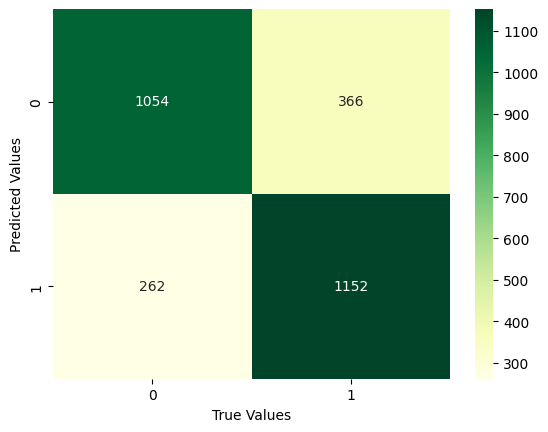

In [78]:

sns.heatmap((confusion_matrix(y_test,pred_svm)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [79]:

print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1420
           1       0.76      0.81      0.79      1414

    accuracy                           0.78      2834
   macro avg       0.78      0.78      0.78      2834
weighted avg       0.78      0.78      0.78      2834



#AdaBoost Classifiers

In [80]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=200,learning_rate=0.03)

In [81]:
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.03, n_estimators=200)

In [82]:

pred_ada = model_ada.predict(x_test)

In [83]:

accuracy_score_ada = accuracy_score(y_test,pred_ada)
accuracy_score_ada*100

84.4742413549753

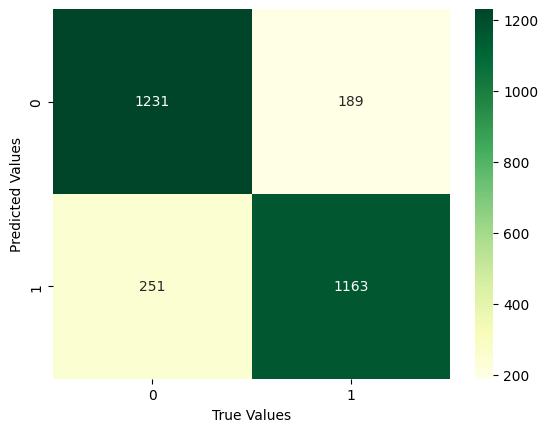

In [84]:
sns.heatmap((confusion_matrix(y_test,pred_ada)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [85]:
print(classification_report(y_test, pred_ada))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1420
           1       0.86      0.82      0.84      1414

    accuracy                           0.84      2834
   macro avg       0.85      0.84      0.84      2834
weighted avg       0.85      0.84      0.84      2834



#XGBooST Classifier


In [86]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=100,learning_rate=0.03)

In [87]:

model_xgb.fit(x_train,y_train)
pred_xgb = model_xgb.predict(x_test)

In [88]:
accuracy_score_xgb = accuracy_score(y_test,pred_xgb)
accuracy_score_xgb*100

96.15384615384616

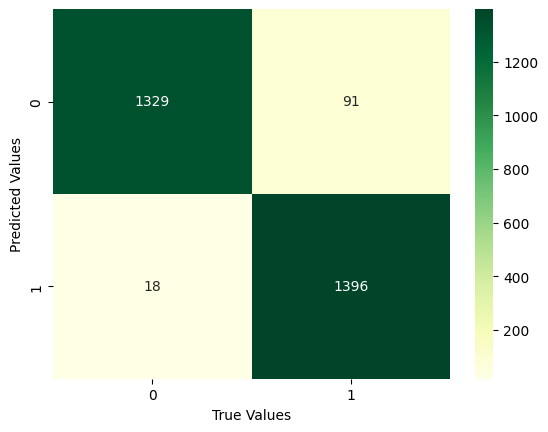

In [89]:
sns.heatmap((confusion_matrix(y_test,pred_xgb)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [90]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1420
           1       0.94      0.99      0.96      1414

    accuracy                           0.96      2834
   macro avg       0.96      0.96      0.96      2834
weighted avg       0.96      0.96      0.96      2834



#Gaussian Naïve Bayes

In [92]:

from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()

In [93]:
model_gnb.fit(x_train,y_train)

GaussianNB()

In [94]:

pred_gnb = model_gnb.predict(x_test)

In [95]:
accuracy_score_gnb = accuracy_score(y_test,pred_gnb)
accuracy_score_gnb*100

80.5575158786168

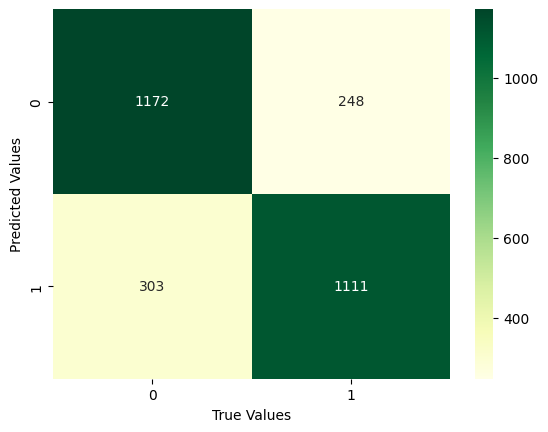

In [96]:
sns.heatmap((confusion_matrix(y_test,pred_gnb)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [97]:
print(classification_report(y_test, pred_gnb))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1420
           1       0.82      0.79      0.80      1414

    accuracy                           0.81      2834
   macro avg       0.81      0.81      0.81      2834
weighted avg       0.81      0.81      0.81      2834



#Gradient Boosting Classifier

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.03)

In [99]:
model_gbc.fit(x_train,y_train)


GradientBoostingClassifier(learning_rate=0.03)

In [100]:
pred_gbc = model_gbc.predict(x_test)

In [101]:
accuracy_score_gbc = accuracy_score(y_test,pred_gbc)
accuracy_score_gbc*100


91.39026111503176

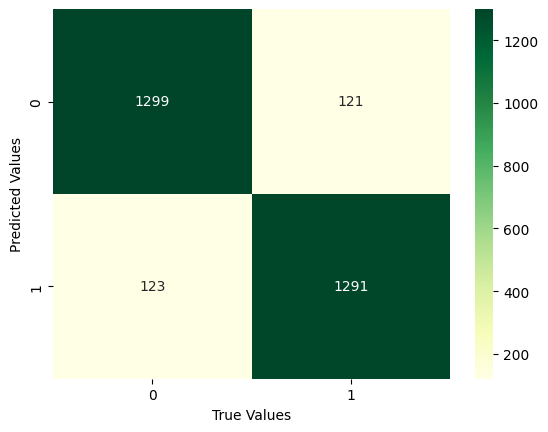

In [102]:
sns.heatmap((confusion_matrix(y_test,pred_gbc)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [103]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1420
           1       0.91      0.91      0.91      1414

    accuracy                           0.91      2834
   macro avg       0.91      0.91      0.91      2834
weighted avg       0.91      0.91      0.91      2834



#Model Accuracy

In [108]:
models = pd.DataFrame({
    "Model": ["Logistic Regression",
              "Decision Tree",
              "Random Forest",
              "KNN",
              "SVM",
              "AdaBoost",
              "XGBoosT",
              "GaussianNB",
              "GradientBoosting"],

    "Accuracy Score" : [accuracy_score_lr*100,accuracy_score_dt*100,accuracy_score_rf*100,accuracy_score_knn*100,
                        accuracy_score_svm*100,accuracy_score_ada*100,accuracy_score_xgb*100,accuracy_score_gnb*100,accuracy_score_gbc*100]

})
models

Model  Accuracy Score
0  Logistic Regression       81.580805
1        Decision Tree       95.800988
2        Random Forest       97.388850
3                  KNN       87.649965
4                  SVM       77.840508
5             AdaBoost       84.474241
6              XGBoosT       96.153846
7           GaussianNB       80.557516
8     GradientBoosting       91.390261

In [105]:
models.sort_values(by="Accuracy Score",ascending= False)

Model  Accuracy Score
2        Random Forest       97.388850
6              XGBoosT       96.153846
1        Decision Tree       95.800988
8     GradientBoosting       91.390261
3                  KNN       87.649965
5             AdaBoost       84.474241
0  Logistic Regression       81.580805
7           GaussianNB       80.557516
4                  SVM       77.840508

#Accuracy Chart

<Axes: xlabel='Accuracy Score', ylabel='Model'>

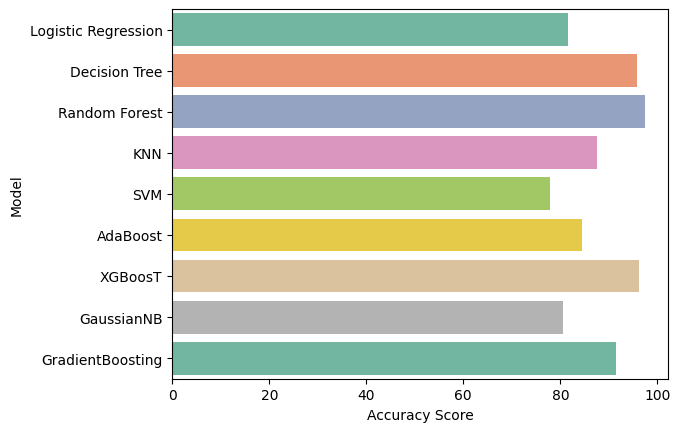

In [109]:
sns.barplot(x="Accuracy Score",y= "Model",data=models, palette='Set2')

#Random Forest Model is giving best accuracy **score**

#Saving the Random Forest model using Pickle library

In [113]:
import pickle


# Save the model to a file
with open('Rf_model.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

#Testing the model

In [114]:
user_input_1 = [1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44, 0.01]
user_input_2 = [1.65, 9.08, 0.04, 2.85, 0.007, 0.35, 0.83, 0.17, 0.05, 0.2, 0, 0.054, 16.08, 1.13, 0.007, 37.75, 6.78, 0.08, 0.34, 0.0]

In [116]:

prediction = model_rf.predict([user_input_1])

# You can print the prediction or do whatever you want with it
print("Prediction:", prediction)

Prediction: [0]


In [117]:

prediction = model_rf.predict([user_input_2])

# You can print the prediction or do whatever you want with it
print("Prediction:", prediction)

Prediction: [1]


#Loading and testing the loaded model

In [118]:

# Now you can load the model from the file
with open('Rf_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [119]:
prediction = loaded_model.predict([user_input_1])
print("Prediction: ", prediction)

Prediction:  [0]


In [120]:
prediction = loaded_model.predict([user_input_2])
print("Prediction: ", prediction)

Prediction:  [1]


##Working fine for both 1 and 0